In [11]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation

In [12]:
def derivs(u, t,G,M1,M2,L1,L2):
    th1,w1,th2,w2=u
    th1_=w1
    th2_=w2
    delta = th2-th1
    den1 = (M1 + M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    w1_= ((M2 * L1 * (w1**2) * sin(delta) * cos(delta)
                + M2 * G * sin(th2) * cos(delta)
                + M2 * L2 * (w2**2) * sin(delta)
                - (M1 + M2) * G * sin(th1))
               / den1)
    den2 = (L2 / L1) * den1
    w2_ = ((- M2 * L2 * (w2**2) * sin(delta) * cos(delta)
                + (M1 + M2) * G * sin(th1) * cos(delta)
                - (M1 + M2) * L1 * (w1**2) * sin(delta)
                - (M1 + M2) * G * sin(th2))
               / den2)

    return np.array([th1_,w1_,th2_,w2_])

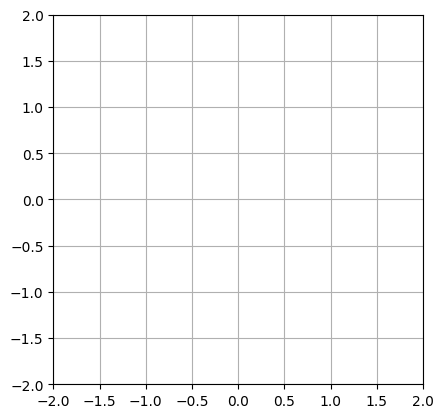

In [15]:

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0, 10, dt)
#parameters
G  = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1m
L2 = 2.0  # length of pendulum 2m
M1 = 1.0  # mass of pendulum 1kg
M2 = 2.0  # mass of pendulum 2kg
# initial state
state = np.array([np.pi/2,5,-np.pi/10,5])

y = odeint(derivs, state, t,args=(G,M1,M2,L1,L2))

x1 = L1 * sin(y[:, 0])
y1 = -L1 * cos(y[:, 0])

x2 = L2 * sin(y[:, 2]) + x1
y2 = -L2 * cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'red', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])

    time_text.set_text('')

    return line, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i * dt))



    return line,time_text

ani = animation.FuncAnimation(fig, animate, range(1, len(y)),
                              interval=20, blit=True, init_func=init)


plt.show()

In [16]:
ani.save('Double_pendulum.gif',writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.
